In [1]:
# Instala as bibliotecas necessárias
!pip install pandas matplotlib seaborn plotly
print("Bibliotecas instaladas com sucesso!")


Bibliotecas instaladas com sucesso!


In [30]:
# Importar todas as bibliotecas necessárias para trabalhar com arquivos de dados tipo CSV e visualização de dados.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
from google.colab import data_table
data_table.enable_dataframe_formatter()
print("Bibliotecas importadas com sucesso!")


Bibliotecas importadas com sucesso!


In [3]:
# Le o arquivo de dados

# Caminho do arquivo CSV
arquivo_dados = '/content/drive/MyDrive/Colab Notebooks/PesquisaCombustivel/pesquisa.csv'
combustivel_df = pd.read_csv(arquivo_dados, sep=';') # Carrega o arquivo CSV em um dataframe do pandas

print("Arquivo carregado com sucesso!")


Arquivo carregado com sucesso!


In [4]:
# Usando o DataFrame combustivel_df: Tamanho do dataframe

print("Tamanho do dataframe:")
print("Linhas, Colunas")
combustivel_df.shape # Retorna uma tupla (linhas, colunas) representando o tamanho do dataframe


Tamanho do dataframe:
Linhas, Colunas


(45064, 15)

In [5]:
# Informações sobre o DataFrame "combustivel_df"
print("Informações:")
combustivel_df.info() # Mostra informações sobre o dataframe


Informações:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45064 entries, 0 to 45063
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   REGIAO           45064 non-null  object
 1   ESTADO           45064 non-null  object
 2   CIDADE           45064 non-null  object
 3   REVENDA          45064 non-null  object
 4   CNPJ             45064 non-null  object
 5   RUA              45064 non-null  object
 6   RUA_NUMERO       45052 non-null  object
 7   RUA_COMPLEMENTO  9901 non-null   object
 8   BAIRRO           44997 non-null  object
 9   CEP              45064 non-null  object
 10  PRODUTO          45064 non-null  object
 11  DATA_COLETA      45064 non-null  object
 12  PRECO_VENDA      45064 non-null  object
 13  UM_MEDIDA        45064 non-null  object
 14  BANDEIRA         45064 non-null  object
dtypes: object(15)
memory usage: 5.2+ MB


In [6]:
# prompt: Usando o DataFrame combustivel_df: Verificar se há valores nulos, em caso positivo, substituir pela string "0".

# Verifica se há valores nulos no DataFrame
valores_nulos = combustivel_df.isnull().sum()
print("\nValores nulos antes do tratamento:\n", valores_nulos)

# Substitui valores nulos pela string "0"
combustivel_df.fillna("0", inplace=True)

# Verifica novamente se há valores nulos após o tratamento
valores_nulos_apos_tratamento = combustivel_df.isnull().sum()
print("\nValores nulos após o tratamento:\n", valores_nulos_apos_tratamento)



Valores nulos antes do tratamento:
 REGIAO                 0
ESTADO                 0
CIDADE                 0
REVENDA                0
CNPJ                   0
RUA                    0
RUA_NUMERO            12
RUA_COMPLEMENTO    35163
BAIRRO                67
CEP                    0
PRODUTO                0
DATA_COLETA            0
PRECO_VENDA            0
UM_MEDIDA              0
BANDEIRA               0
dtype: int64

Valores nulos após o tratamento:
 REGIAO             0
ESTADO             0
CIDADE             0
REVENDA            0
CNPJ               0
RUA                0
RUA_NUMERO         0
RUA_COMPLEMENTO    0
BAIRRO             0
CEP                0
PRODUTO            0
DATA_COLETA        0
PRECO_VENDA        0
UM_MEDIDA          0
BANDEIRA           0
dtype: int64


In [7]:
# prompt: Usando o dataframe combustivel_df: A coluna DATA_COLETA deve ser tratada como date. A coluna PRECO_VENDA deve ser tratado como float.

# Tratar a coluna DATA_COLETA como data
combustivel_df['DATA_COLETA'] = pd.to_datetime(combustivel_df['DATA_COLETA'], format='%d/%m/%Y')

# Tratar a coluna PRECO_VENDA como float.
combustivel_df['PRECO_VENDA'] = combustivel_df['PRECO_VENDA'].str.replace(',','.', regex=True)
combustivel_df['PRECO_VENDA'] = combustivel_df['PRECO_VENDA'].astype(float)

# Informações sobre o DataFrame "combustivel_df" após as alterações
combustivel_df.info() # Mostra informações sobre o dataframe após as alterações


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45064 entries, 0 to 45063
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   REGIAO           45064 non-null  object        
 1   ESTADO           45064 non-null  object        
 2   CIDADE           45064 non-null  object        
 3   REVENDA          45064 non-null  object        
 4   CNPJ             45064 non-null  object        
 5   RUA              45064 non-null  object        
 6   RUA_NUMERO       45064 non-null  object        
 7   RUA_COMPLEMENTO  45064 non-null  object        
 8   BAIRRO           45064 non-null  object        
 9   CEP              45064 non-null  object        
 10  PRODUTO          45064 non-null  object        
 11  DATA_COLETA      45064 non-null  datetime64[ns]
 12  PRECO_VENDA      45064 non-null  float64       
 13  UM_MEDIDA        45064 non-null  object        
 14  BANDEIRA         45064 non-null  objec

In [9]:
# Visualiza o dataframe "combustivel_df"
data_table.DataTable(combustivel_df, num_rows_per_page=6, max_rows=100)


,REGIAO,ESTADO,CIDADE,REVENDA,CNPJ,RUA,RUA_NUMERO,RUA_COMPLEMENTO,BAIRRO,CEP,PRODUTO,DATA_COLETA,PRECO_VENDA,UM_MEDIDA,BANDEIRA
0,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,0,JARDIM ZULMIRA,18061-000,GASOLINA,2024-06-25,4.79,/ litro,BRANCA
1,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,0,JARDIM ZULMIRA,18061-000,ETANOL,2024-06-25,3.29,/ litro,BRANCA
2,N,AC,CRUZEIRO DO SUL,AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.492.748/0003-83,AVENIDA COPACABANA,440,0,COPACABANA,69980-000,GASOLINA,2024-06-26,7.30,/ litro,IPIRANGA
3,N,AC,CRUZEIRO DO SUL,AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.492.748/0003-83,AVENIDA COPACABANA,440,0,COPACABANA,69980-000,GASOLINA ADITIVADA,2024-06-26,7.39,/ litro,IPIRANGA
4,N,AC,CRUZEIRO DO SUL,AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.492.748/0003-83,AVENIDA COPACABANA,440,0,COPACABANA,69980-000,ETANOL,2024-06-26,5.54,/ litro,IPIRANGA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45059,NE,RN,PARNAMIRIM,PB COMBUSTIVEIS LTDA,53.930.207/0001-21,AVENIDA DOUTOR MÁRIO NEGÓCIO,1840,0,SANTA TEREZA,59142-380,GASOLINA,2024-07-15,6.39,/ litro,ALE
45060,NE,RN,PARNAMIRIM,PB COMBUSTIVEIS LTDA,53.930.207/0001-21,AVENIDA DOUTOR MÁRIO NEGÓCIO,1840,0,SANTA TEREZA,59142-380,ETANOL,2024-07-15,5.39,/ litro,ALE
45061,NE,RN,PARNAMIRIM,PB COMBUSTIVEIS LTDA,53.930.207/0001-21,AVENIDA DOUTOR MÁRIO NEGÓCIO,1840,0,SANTA TEREZA,59142-380,GASOLINA ADITIVADA,2024-07-15,6.59,/ litro,ALE
45062,NE,RN,CAICO,POSTOS ELO LTDA,50.216.766/0001-86,RUA JULIO RODRIGUES,196,0,DARCY FONSECA,59300-000,GASOLINA,2024-07-17,6.68,/ litro,IPIRANGA


In [10]:
# prompt: Usando o dataframe combustivel_df: Listar os valores únicos da coluna "PRODUTO".

# Lista os valores únicos da coluna "PRODUTO"
valores_unicos_produto = combustivel_df['PRODUTO'].unique()

# Imprime os valores únicos
print(f"Valores únicos: {valores_unicos_produto}")

# Normaliza esses valores.
combustivel_df['PRODUTO'] = combustivel_df['PRODUTO'].str.upper()
combustivel_df['PRODUTO'] = combustivel_df['PRODUTO'].str.replace(' ', '_')

# Lista os valores únicos da coluna "PRODUTO"
valores_unicos_produto = combustivel_df['PRODUTO'].unique()

# Imprime os valores únicos
print(f"Valores únicos após a normalização: {valores_unicos_produto}")


Valores únicos: ['GASOLINA' 'ETANOL' 'GASOLINA ADITIVADA']
Valores únicos após a normalização: ['GASOLINA' 'ETANOL' 'GASOLINA_ADITIVADA']


In [12]:
# prompt: Usando o dataframe combustivel_df: Converter a coluna PRODUTO em valores numéricos, usando a seguinte legenda:
# GASOLINA = "1", GASOLINA_ADITIVADA = "2", ETANOL = "3".

# Substitui os valores na coluna 'PRODUTO' por valores numéricos
combustivel_df['PRODUTO'] = combustivel_df['PRODUTO'].replace({
    'GASOLINA': '1',
    'GASOLINA_ADITIVADA': '2',
    'ETANOL': '3'
})

# Converte a coluna 'PRODUTO' para o tipo numérico
combustivel_df['PRODUTO'] = pd.to_numeric(combustivel_df['PRODUTO'])

# Exibe o DataFrame após a conversão
combustivel_df.head()


,REGIAO,ESTADO,CIDADE,REVENDA,CNPJ,RUA,RUA_NUMERO,RUA_COMPLEMENTO,BAIRRO,CEP,PRODUTO,DATA_COLETA,PRECO_VENDA,UM_MEDIDA,BANDEIRA
0,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,0,JARDIM ZULMIRA,18061-000,1,2024-06-25,4.79,/ litro,BRANCA
1,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,0,JARDIM ZULMIRA,18061-000,3,2024-06-25,3.29,/ litro,BRANCA
2,N,AC,CRUZEIRO DO SUL,AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.492.748/0003-83,AVENIDA COPACABANA,440,0,COPACABANA,69980-000,1,2024-06-26,7.30,/ litro,IPIRANGA
3,N,AC,CRUZEIRO DO SUL,AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.492.748/0003-83,AVENIDA COPACABANA,440,0,COPACABANA,69980-000,2,2024-06-26,7.39,/ litro,IPIRANGA
4,N,AC,CRUZEIRO DO SUL,AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.492.748/0003-83,AVENIDA COPACABANA,440,0,COPACABANA,69980-000,3,2024-06-26,5.54,/ litro,IPIRANGA


In [13]:
# prompt: Usando o DataFrame combustivel_df: Criar um novo DataFrame apenas com os registros onde a coluna ESTADO = "RS"

combustivel_df_rs = combustivel_df[combustivel_df['ESTADO'] == 'RS'] # Cria o novo dataframe

# Visualiza o dataframe "combustivel_df_rs"
data_table.DataTable(combustivel_df_rs, num_rows_per_page=6)


,REGIAO,ESTADO,CIDADE,REVENDA,CNPJ,RUA,RUA_NUMERO,RUA_COMPLEMENTO,BAIRRO,CEP,PRODUTO,DATA_COLETA,PRECO_VENDA,UM_MEDIDA,BANDEIRA
2843,S,RS,ALVORADA,ANTONIO HOFFMANN SANTANA,08.818.686/0001-34,AVENIDA PRESIDENTE GETULIO VARGAS,3501,0,PRIMAVERA,94818-000,1,2024-06-25,5.89,/ litro,VIBRA
2844,S,RS,ALVORADA,ANTONIO HOFFMANN SANTANA,08.818.686/0001-34,AVENIDA PRESIDENTE GETULIO VARGAS,3501,0,PRIMAVERA,94818-000,2,2024-06-25,5.99,/ litro,VIBRA
2845,S,RS,ALVORADA,ANTONIO HOFFMANN SANTANA,08.818.686/0001-34,AVENIDA PRESIDENTE GETULIO VARGAS,3501,0,PRIMAVERA,94818-000,3,2024-06-25,5.29,/ litro,VIBRA
2846,S,RS,ALVORADA,ABASTECEDORA DE COMBUSTIVEIS ALGARVE LTDA,08.823.548/0001-43,AVENIDA ZERO HORA,340,0,JARDIM ALGARVE,94810-000,1,2024-06-25,5.79,/ litro,BRANCA
2847,S,RS,ALVORADA,ABASTECEDORA DE COMBUSTIVEIS ALGARVE LTDA,08.823.548/0001-43,AVENIDA ZERO HORA,340,0,JARDIM ALGARVE,94810-000,2,2024-06-25,5.84,/ litro,BRANCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44978,S,RS,OSORIO,POSTO ALDEIAO COMERCIO DE COMBUSTIVEIS LTDA,28.259.725/0002-07,AVENIDA JORGE DARIVA,1536,0,CENTRO,95520-000,3,2024-07-17,4.59,/ litro,RODOIL
44979,S,RS,OSORIO,POSTO ALDEIAO COMERCIO DE COMBUSTIVEIS LTDA,28.259.725/0002-07,AVENIDA JORGE DARIVA,1536,0,CENTRO,95520-000,2,2024-07-17,6.09,/ litro,RODOIL
45012,S,RS,NOVO HAMBURGO,SIM REDE DE POSTOS LTDA,07.473.735/0201-07,AVENIDA SETE DE SETEMBRO,1270,0,IDEAL,93332-114,1,2024-07-17,6.16,/ litro,BRANCA
45013,S,RS,NOVO HAMBURGO,SIM REDE DE POSTOS LTDA,07.473.735/0201-07,AVENIDA SETE DE SETEMBRO,1270,0,IDEAL,93332-114,2,2024-07-17,6.36,/ litro,BRANCA


In [14]:
# Tamanho do combustivel_df_rs

combustivel_df_rs.shape # Retorna uma tupla (linhas, colunas) representando o tamanho do dataframe


(2903, 15)

In [15]:
# Com base no dataframe combustivel_df_rs, criar um novo dataframe apenas com a CIDADE = "SANTA MARIA"

combustivel_df_rs_santa_maria = combustivel_df_rs[combustivel_df_rs['CIDADE'] == 'SANTA MARIA'] # Cria o novo dataframe

# Visualiza o dataframe "combustivel_df_rs_santa_maria"
data_table.DataTable(combustivel_df_rs_santa_maria, num_rows_per_page=6)


,REGIAO,ESTADO,CIDADE,REVENDA,CNPJ,RUA,RUA_NUMERO,RUA_COMPLEMENTO,BAIRRO,CEP,PRODUTO,DATA_COLETA,PRECO_VENDA,UM_MEDIDA,BANDEIRA
2954,S,RS,SANTA MARIA,AUTO POSTO BITTENCOURT LTDA,00.162.288/0003-62,AVENIDA BORGES DE MEDEIROS,1178,0,NOSSA SENHORA DO ROSARIO,97010-080,1,2024-06-28,5.84,/ litro,IPIRANGA
2955,S,RS,SANTA MARIA,AUTO POSTO BITTENCOURT LTDA,00.162.288/0003-62,AVENIDA BORGES DE MEDEIROS,1178,0,NOSSA SENHORA DO ROSARIO,97010-080,2,2024-06-28,5.99,/ litro,IPIRANGA
2956,S,RS,SANTA MARIA,H. D. PORTELLA & CIA LTDA,07.663.077/0001-90,AVENIDA FERNANDO FERRARI,1255,0,NOSSA SRA DE LOURDES,97050-801,1,2024-06-24,5.87,/ litro,IPIRANGA
2957,S,RS,SANTA MARIA,H. D. PORTELLA & CIA LTDA,07.663.077/0001-90,AVENIDA FERNANDO FERRARI,1255,0,NOSSA SRA DE LOURDES,97050-801,3,2024-06-24,4.29,/ litro,IPIRANGA
2958,S,RS,SANTA MARIA,AUTO POSTO MEDIANEIRA LTDA,05.861.600/0001-68,RUA BARAO DO TRIUNFO,SN,ESQUINA AV MEDIANEIRA,CENTRO,97010-070,1,2024-06-24,5.99,/ litro,VIBRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44190,S,RS,SANTA MARIA,J.A. COMERCIO DE COMBUSTIVEIS LTDA,07.841.460/0001-91,RUA VENANCIO AIRES,2334,POSTO,PASSO D'AREIA,97020-620,2,2024-07-16,6.39,/ litro,RAIZEN
44368,S,RS,SANTA MARIA,SIM REDE DE POSTOS LTDA,07.473.735/0150-22,RODOVIA BR-287,8589,0,CAMOBI,97105-198,1,2024-07-16,6.19,/ litro,BRANCA
44369,S,RS,SANTA MARIA,SIM REDE DE POSTOS LTDA,07.473.735/0150-22,RODOVIA BR-287,8589,0,CAMOBI,97105-198,2,2024-07-16,6.39,/ litro,BRANCA
44759,S,RS,SANTA MARIA,POSTO DE COMBUSTIVEIS DAL RI LTDA.,08.824.904/0008-10,RUA EUCLIDES DA CUNHA,1200,0,PRESIDENTE JOAO GOULART,97090-475,1,2024-07-16,6.59,/ litro,RAIZEN


In [16]:
# Tamanho do dataframe combustivel_df_rs_santa_maria

combustivel_df_rs_santa_maria.shape # Retorna uma tupla (linhas, colunas) representando o tamanho do dataframe


(125, 15)

In [21]:
# prompt: Usando o DataFrame combustivel_df_rs_santa_maria: Listar as 3 Revendas com o menor preço, separado por "PRODUTO".

# Agrupa por 'PRODUTO' e encontra as 3 revendas com menor preço para cada produto
top3_por_produto = combustivel_df_rs_santa_maria.groupby('PRODUTO').apply(lambda x: x.nsmallest(3, 'PRECO_VENDA'))

# Reinicia o índice do DataFrame resultante
top3_por_produto = top3_por_produto.reset_index(drop=True)

# Exibe o resultado
print("Top 3 Revendas com Menor Preço por Produto:")
print(top3_por_produto[['PRODUTO', 'REVENDA', 'PRECO_VENDA']])


Top 3 Revendas com Menor Preço por Produto:
   PRODUTO                                  REVENDA  PRECO_VENDA
0        1                  PENINHA AUTO POSTO LTDA         5.75
1        1              AUTO POSTO BITTENCOURT LTDA         5.79
2        1  BUSS CEZAR COMERCIO DE COMBUSTIVEL LTDA         5.83
3        2                H. D. PORTELLA & CIA LTDA         5.97
4        2                H. D. PORTELLA & CIA LTDA         5.97
5        2                H. D. PORTELLA & CIA LTDA         5.97
6        3        WMS SUPERMERCADOS DO BRASIL LTDA.         4.27
7        3                H. D. PORTELLA & CIA LTDA         4.29
8        3                H. D. PORTELLA & CIA LTDA         4.29


In [22]:
# prompt: Usando o DataFrame combustivel_df_rs_santa_maria: Usando a coluna "PRODUTO": Usando o PRODUTO = "1": Calcular: Preço minimo, Preço maximo, Media, Mediana, Moda.

# Filtra o DataFrame para o PRODUTO = 1 - Gasolina
produto_1_df = combustivel_df_rs_santa_maria[combustivel_df_rs_santa_maria['PRODUTO'] == 1]

# Calcula as estatísticas descritivas
preco_minimo = produto_1_df['PRECO_VENDA'].min()
preco_maximo = produto_1_df['PRECO_VENDA'].max()
preco_medio = produto_1_df['PRECO_VENDA'].mean()
preco_mediana = produto_1_df['PRECO_VENDA'].median()
preco_moda = produto_1_df['PRECO_VENDA'].mode()[0]  # Considera a primeira moda caso haja múltiplas

# Imprime os resultados
print("Estatísticas descritivas para o PRODUTO = 1 - Gasolina:")
print(f"Preço mínimo: R$ {preco_minimo:.2f}")
print(f"Preço máximo: R$ {preco_maximo:.2f}")
print(f"Preço médio: R$ {preco_medio:.2f}")
print(f"Preço mediano: R$ {preco_mediana:.2f}")
print(f"Preço moda: R$ {preco_moda:.2f}")


Estatísticas descritivas para o PRODUTO = 1 - Gasolina:
Preço mínimo: R$ 5.75
Preço máximo: R$ 6.59
Preço médio: R$ 6.03
Preço mediano: R$ 5.97
Preço moda: R$ 5.87


In [23]:
# prompt: Usando o DataFrame combustivel_df_rs_santa_maria: Usando a coluna "PRODUTO": Usando o PRODUTO = "2": Calcular: Preço minimo, Preço maximo, Media, Mediana, Moda.

# Filtra o DataFrame para o PRODUTO = 2 - Gasolina Aditivada
produto_2_df = combustivel_df_rs_santa_maria[combustivel_df_rs_santa_maria['PRODUTO'] == 2]

# Calcula as estatísticas descritivas
preco_minimo = produto_2_df['PRECO_VENDA'].min()
preco_maximo = produto_2_df['PRECO_VENDA'].max()
preco_medio = produto_2_df['PRECO_VENDA'].mean()
preco_mediana = produto_2_df['PRECO_VENDA'].median()
preco_moda = produto_2_df['PRECO_VENDA'].mode()[0]  # Considera a primeira moda caso haja múltiplas

# Imprime os resultados
print("Estatísticas descritivas para o PRODUTO = 2 - Gasolina Aditivada:")
print(f"Preço mínimo: R$ {preco_minimo:.2f}")
print(f"Preço máximo: R$ {preco_maximo:.2f}")
print(f"Preço médio: R$ {preco_medio:.2f}")
print(f"Preço mediano: R$ {preco_mediana:.2f}")
print(f"Preço moda: R$ {preco_moda:.2f}")


Estatísticas descritivas para o PRODUTO = 2 - Gasolina Aditivada:
Preço mínimo: R$ 5.97
Preço máximo: R$ 6.89
Preço médio: R$ 6.20
Preço mediano: R$ 6.15
Preço moda: R$ 5.99


In [24]:
# prompt: Usando o DataFrame combustivel_df_rs_santa_maria: Usando a coluna "PRODUTO": Usando o PRODUTO = "3": Calcular: Preço minimo, Preço maximo, Media, Mediana, Moda.

# Filtra o DataFrame para o PRODUTO = 3 - Etanol
produto_3_df = combustivel_df_rs_santa_maria[combustivel_df_rs_santa_maria['PRODUTO'] == 3]

# Calcula as estatísticas descritivas
preco_minimo = produto_3_df['PRECO_VENDA'].min()
preco_maximo = produto_3_df['PRECO_VENDA'].max()
preco_medio = produto_3_df['PRECO_VENDA'].mean()
preco_mediana = produto_3_df['PRECO_VENDA'].median()
preco_moda = produto_3_df['PRECO_VENDA'].mode()[0]  # Considera a primeira moda caso haja múltiplas

# Imprime os resultados
print("Estatísticas descritivas para o PRODUTO = 3 - Etanol:")
print(f"Preço mínimo: R$ {preco_minimo:.2f}")
print(f"Preço máximo: R$ {preco_maximo:.2f}")
print(f"Preço médio: R$ {preco_medio:.2f}")
print(f"Preço mediano: R$ {preco_mediana:.2f}")
print(f"Preço moda: R$ {preco_moda:.2f}")


Estatísticas descritivas para o PRODUTO = 3 - Etanol:
Preço mínimo: R$ 4.27
Preço máximo: R$ 4.69
Preço médio: R$ 4.45
Preço mediano: R$ 4.49
Preço moda: R$ 4.29


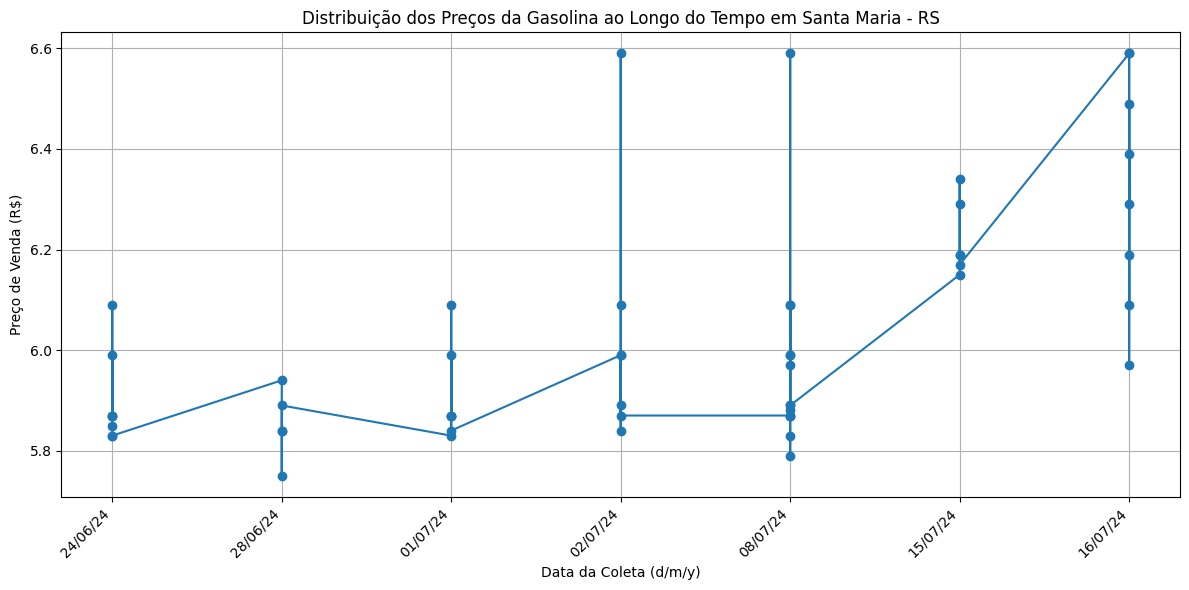

In [34]:
# prompt: Usando o DataFrame combustivel_df_rs_santa_maria: Usando a coluna "PRODUTO": Usando o PRODUTO = "1": Gerar um gráfico com a distribuição dos preços ao longo do tempo. DATA_COLETA deve estar no formato "d/m/y". Ordenar em ordem crescente da DATA_COLETA.

# Filtra o DataFrame para o PRODUTO = 1 - Gasolina
gasolina_df = combustivel_df_rs_santa_maria[combustivel_df_rs_santa_maria['PRODUTO'] == 1]

# Ordena o DataFrame pela DATA_COLETA em ordem crescente
gasolina_df_ordenado = gasolina_df.sort_values(by='DATA_COLETA')

# Formata a coluna DATA_COLETA para o formato "d/m/y"
gasolina_df_ordenado['DATA_COLETA'] = gasolina_df_ordenado['DATA_COLETA'].dt.strftime('%d/%m/%y')

# Cria o gráfico de linha
plt.figure(figsize=(12, 6))
plt.plot(gasolina_df_ordenado['DATA_COLETA'], gasolina_df_ordenado['PRECO_VENDA'], marker='o', linestyle='-')
plt.xlabel('Data da Coleta (d/m/y)')
plt.ylabel('Preço de Venda (R$)')
plt.title('Distribuição dos Preços da Gasolina ao Longo do Tempo em Santa Maria - RS')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.grid(True)
plt.tight_layout()
plt.show()
